In [4]:
# imports required packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
config={
  "model"           : "vgg16",
  "weights"         : "imagenet",

  "features_path"   : "/home/liganium/Documents/Django/Django- Create_Deploy_CVModel/cdd/car_damage_check/FRS/features.h5",
  "labels_path"     : "/home/liganium/Documents/Django/Django- Create_Deploy_CVModel/cdd/car_damage_check/FRS/labels.h5",
  "classifier_path" : "/home/liganium/Documents/Django/Django- Create_Deploy_CVModel/cdd/car_damage_check/FRS/classifier.pickle",
  "model_path"      : "/home/liganium/Documents/Django/Django- Create_Deploy_CVModel/cdd/car_damage_check/FRS/model",

  "test_size"       : 0.20,
  "seed"            : 9,
}

In [6]:
# config variables
test_size     = config["test_size"]
seed      = config["seed"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
classifier_path = config["classifier_path"]

In [7]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [8]:
# verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] features shape: (979, 4096)
[INFO] labels shape: (979,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (783, 4096)
[INFO] test data   : (196, 4096)
[INFO] train labels: (783,)
[INFO] test labels : (196,)


In [9]:
# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


/home/liganium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=9)

In [10]:
# evaluate the model of test data
preds = model.predict(testData)

In [12]:
preds

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0,
       1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [11]:
preds.shape

(196,)

In [13]:
# dump classifier to file
print ("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] saving model...


In [14]:
# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)

In [15]:
cm

array([[64,  8,  7],
       [12, 48,  4],
       [ 7,  8, 38]])

In [17]:
accuracy = ((64+48+38)/196)*100

In [18]:
accuracy

76.53061224489795

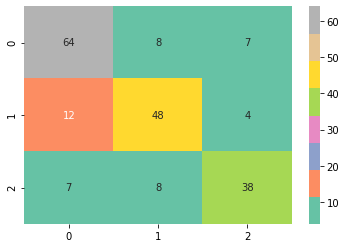

In [19]:
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()